# Simple regression in Python

### 1. Importing the data set

In [21]:
# Import pandas library
import pandas as pd

In [22]:
# Import pydataset library, which has the data set that will be used.
import pydataset
# Import the table named agefat that includes information about the age and 
# about body fat percentage of a participants sample.
composition=pydataset.data('agefat')

In [23]:
# It is possible to get detailed information about the data set using the 
# the following code. 
pydataset.data('agefat',show_doc=True)

agefat

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Total Body Composision Data

### Description

Age and body fat percentage of 25 normal adults.

### Usage

    data("agefat")

### Format

A data frame with 25 observations on the following 3 variables.

`age`

the age of the subject.

`fat`

the body fat percentage.

`sex`

a factor with levels `female` and `male`.

### Details

The data come from a study investigating a new methods of measuring body
composition (see Mazess et al, 1984), and give the body fat percentage
(percent fat), age and sex for 25 normal adults aged between 23 and 61 years.
The questions of interest are how are age and percent fat related, and is
there any evidence that the relationship is different for males and females.

### Source

R. B. Mazess, W. W. Peppler and M. Gibbons (1984), Total body composition by
dual-photon (153Gd) absorptiometry. _American Journal of Clinical Nutrition_,
**40**, 834–839.

### Exam

### 2. Preparing the data set

In [24]:
# 2.1. Identifying data set variables
composition.head()

,age,fat,sex
1,24,15.5,male
2,37,20.9,male
3,41,18.6,male
4,60,28.0,male
5,31,34.7,female


In [25]:
# 2.2. Dropping unnecesary columns
# Data frames have the method drop to remove columns. The parameter named columns is equal to a 
# string including the names of the columns to be removed. 
composition.drop(columns='sex',inplace=True)
# It is possible to see that the column 'sex' was removed.
composition.head()

,age,fat
1,24,15.5
2,37,20.9
3,41,18.6
4,60,28.0
5,31,34.7


In [26]:
# 2.3. Detecting missing values 
# The method isna() returns True if a column value is equal to nan 
# In both columns, age and fat, there are no missing values.
print('Columna age:')
print(composition.age[composition.age.isna()])
print('Columna fat:')
print(composition.fat[composition.fat.isna()])

Columna age:
Series([], Name: age, dtype: int64)
Columna fat:
Series([], Name: fat, dtype: float64)


Text(0.5, 1.0, 'Boxplot of Fat')

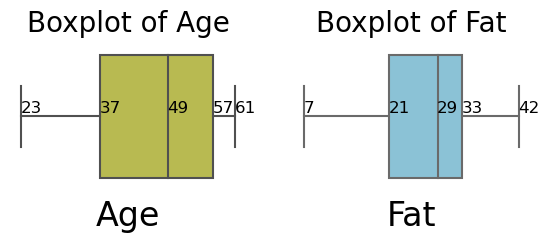

In [27]:
# 2.4. Detecting outliers

# To detect outliers we'll import the libraries seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Here are shown to ways of identifying outliers: one graphically, and another one statistically.

# 2.4.1 Detecting outliers graphically

# The seaborn library  has the method boxplot, which returns a plot of the distribution of the data
# depicting: the median; the first, and third quartiles; and the whiskers. The whiskers represent the upper 
# and lower limits, which are equal to the maximum and minimum values, respectively, if there are no 
# outliers or equal to reference values to detect, if there are, outliers. Outliers are represented 
# as points above or below the whiskers.

# Two subplots are created by utilizing the subplots() function.
fig, axes=plt.subplots(1,2,figsize=(6.7,2))

# Plot two boxplots, one for the age variable and another one for the variable fat.
sns.boxplot(x=composition['age'], color='#C9CC3F',ax=axes[0])
sns.boxplot(x=composition['fat'], color='#7EC8E3',ax=axes[1])

# Label the axes.
axes[0].set_xlabel('Age', fontsize = 24) 
axes[1].set_xlabel('Fat', fontsize = 24)

# Placing label ticks.
axes[0].set(xticklabels=[],xticks=[],yticks=[])
axes[1].set(xticklabels=[],xticks=[],yticks=[])

# Remove the plot borders. 
for i, a in enumerate(axes):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)
    
# Add text to the boxplot of the variable "age" 
axes[0].text(composition.age.min(),-0.03, str(composition.age.min()),size=12)
axes[0].text(composition.age.max(),-0.03, str(composition.age.max()),size=12)
axes[0].text(int(composition.age.median()),-0.03, str(int(composition.age.median())),size=12)
axes[0].text(composition.age.quantile(q=0.25),-0.03, str(int(composition.age.quantile(q=0.25))),size=12)
axes[0].text(composition.age.quantile(q=0.75),-0.03, str(int(composition.age.quantile(q=0.75))),size=12)
axes[0].set_title('Boxplot of Age', size=20)

# Add text to the boxplot of the variable "fat"
axes[1].text(composition.fat.min(),-0.03,str(int(composition.fat.min())),size=12)
axes[1].text(composition.fat.max(),-0.03,str(int(composition.fat.max())),size=12)
axes[1].text(int(composition.fat.median()),-0.03,str(int(composition.fat.median())),size=12)
axes[1].text(composition.fat.quantile(q=0.25),-0.03,str(int(composition.fat.quantile(q=0.25))),size=12)
axes[1].text(composition.fat.quantile(q=0.75),-0.03,str(int(composition.fat.quantile(q=0.75))),size=12)
axes[1].set_title('Boxplot of Fat', size=20)
    

Text(0.5, 1.0, 'Histogram of Fat')

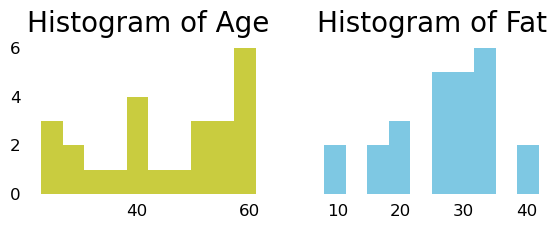

In [28]:
# Histogram

# Define two sub plots using the function subplots()
fig, axes=plt.subplots(1,2,figsize=(6.7,2), sharey=True)

# Plot two histograms, one for the variable age and another one for the variable fat.
axes[0].hist(composition['age'],bins=10, color='#C9CC3F')
axes[1].hist(composition['fat'],bins=10, color='#7EC8E3')

for i, a in enumerate(axes):
    # Remove the plot's frame
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)
    # Ticks format
    a.tick_params(axis='x',labelsize=12,bottom=False)
    a.tick_params(axis='y',labelsize=12, left=False)
    
# Histogram titles
axes[0].set_title('Histogram of Age', size=20)
axes[1].set_title('Histogram of Fat', size=20)

In [29]:
#2.4.2 Statistically

# Interquartile range

# The interquartile range - IQR includes 50% of the data, 
# which is in the middle of the distribution. It is located among the first and third quartiles.
# This range is used to estimate upper and lower reference values. The values above 
# or below these references are considered as outliers.

# "age" variable outliers
# Estimate the quartiles
percentile25 = composition['age'].quantile(0.25)
print("First quartile: {}".format(percentile25))
percentile75 = composition['age'].quantile(0.75)
print("Second quartile: {}".format(percentile75))

First quartile: 37.0
Second quartile: 57.0


In [30]:
# Estimate the interquartile range:
iqr=percentile75-percentile25
print("The interquartile range is: {}".format(iqr))

The interquartile range is: 20.0


In [31]:
# Estimate the uppper and lower reference values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("The upper reference value is: {}".format(upper_limit))
print("The lower reference value is: {}".format(lower_limit))

The upper reference value is: 87.0
The lower reference value is: 7.0


In [32]:
# Detecting outliers
print('Age data series outliers above the upper reference value')
print(composition.age[composition['age'] > upper_limit])
print('Age data series outliers below the lower reference value')
print(composition.age[composition['age'] < lower_limit])

Age data series outliers above the upper reference value
Series([], Name: age, dtype: int64)
Age data series outliers below the lower reference value
Series([], Name: age, dtype: int64)


#### Outliers in the data frame

In [33]:
# Estimate the quartiles
percentile25 = composition['fat'].quantile(0.25)
print("First quartile: {}".format(percentile25))
percentile75 = composition['fat'].quantile(0.75)
print("Second quartile: {}".format(percentile75))

First quartile: 21.3
Second quartile: 33.0


In [34]:
# Estimate the interquartile range
iqr=percentile75-percentile25
print("The interquartile range is: {}".format(iqr))

The interquartile range is: 11.7


In [35]:
# Estimate the upper and lower reference values.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("The upper reference value is:{}".format(upper_limit))
print("The lower reference value is:{}".format(lower_limit))

The upper reference value is:50.55
The lower reference value is:3.7500000000000036


In [36]:
# Detecting outliers.
print('Fat series outliers above the upper reference value:')
print(composition.fat[composition['fat'] > upper_limit])
print('Fat series outliers below the lower reference value:')
print(composition.fat[composition['fat'] < lower_limit])

Fat series outliers above the upper reference value:
Series([], Name: fat, dtype: float64)
Fat series outliers below the lower reference value:
Series([], Name: fat, dtype: float64)


### 3. Analyzing the data set

In [37]:
# 3.1. Descriptive statistics

# To analyze the data, we use the mean, standard deviation, minimum and maximum.
composition.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,25.0,44.96,13.15,23.0,37.0,49.0,57.0,61.0
fat,25.0,27.37,8.68,7.8,21.3,29.1,33.0,42.0


In [38]:
# 3.2. Correlation
# The data frame has the method corr() to estimate the correlation matrix among the variables.
# The correlation among the variables is positive and equal to 0.66
composition.corr().round(2)

,age,fat
age,1.00,0.66
fat,0.66,1.00


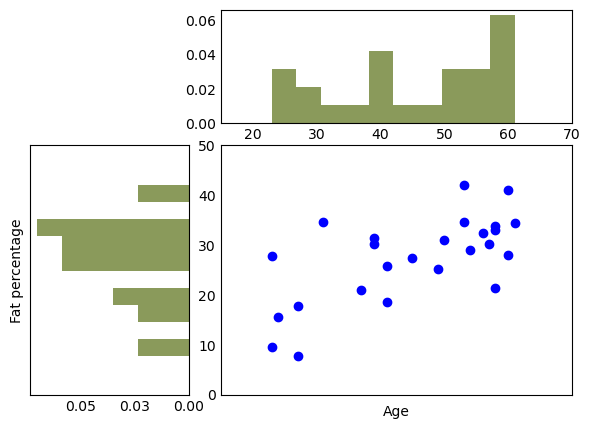

In [39]:
# 3.3. Plotting the variables
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

# A grid of three plots is created, a scatter plot and two histograms, one for 
# for each variable of the scatter plot. 
plt.figure(figsize=(7,5))
gspec = gridspec.GridSpec(3, 3)

# Define three sub plots.
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# Data is plotted in each sub plot.
# Lower right plot
lower_right.scatter(composition.age,composition.fat,color='blue')
lower_right.set(xticklabels=[])
lower_right.tick_params(labelsize=10,length=0)
lower_right.set_xlabel('Age',size=10)
# Top plot
top_histogram.hist(composition.age, bins=10,  density=True,color='#8A9A5B')
top_histogram.tick_params(labelsize=10,length=0)
# Side plot
side_histogram.hist(composition.fat, bins=10, orientation='horizontal',  density=True,color='#8A9A5B');
side_histogram.set(yticks=[])
side_histogram.set_ylabel('Fat percentage',size=10)
side_histogram.tick_params(labelsize=10,length=0)

# Invert x axis
side_histogram.invert_xaxis()

# Axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(15, 70)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 50)
for ax in [top_histogram]: 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
for ax in [side_histogram]: 
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

### 4. Regression estimation

In [40]:
from statsmodels.formula. api import ols
# The ols function is used to estimate a regression using the OLS method.
reg = ols ("fat~age", composition).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     17.64
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           0.000342
Time:                        21:47:16   Log-Likelihood:                -81.871
No. Observations:                  25   AIC:                             167.7
Df Residuals:                      23   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8151      4.843      1.614      0.120      -2.203      17.833
age            0.4349      0.104      4.200      0.000       0.221       0.649
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.269
Skew:                           0.181   Prob(JB):                        0.874
Kurtosis:                       2.643   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Heteroskedasticity tests 

In [41]:
# White test
# The function het_white performs the heteroskedasticity test. 
# It takes as arguments the residuals and the explanatory variables. 
from statsmodels.stats.diagnostic import het_white
white_test = het_white(reg.resid,  reg.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 2.9757423578048696, 'Test Statistic p-value': 0.22585294464677336, 'F-Statistic': 1.486232429153108, 'F-Test p-value': 0.24806984303103988}


Text(0.5, 1.0, 'Fat versus Age \n Scatter plot')

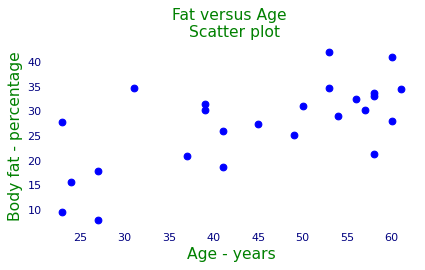

In [42]:
import matplotlib.pyplot as plt
# Scatter plot to perform a heteroskedasticity analysis.
# Define the plot 
plt.figure(figsize=(6, 3), dpi=80)

# Scatter plot
plt.scatter(composition.age,composition.fat,color='blue')
ax=plt.gca()

# Describe the axes labels
ax.set_ylabel('Body fat - percentage', color='green',size=14)
ax.set_xlabel('Age - years',color='green',size=14)

# Remove the plot's borders 
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    
ax.tick_params(axis=u'both', which=u'both',length=0,colors='navy',labelsize=10)

# Insert the title
ax.set_title('Fat versus Age \n Scatter plot',color='green',size=14)

<Figure size 400x300 with 0 Axes>

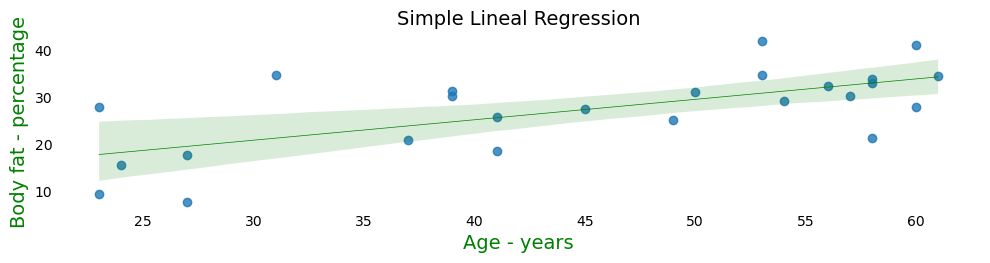

In [43]:
# Plotting the regression

import seaborn as sns
import matplotlib.pyplot as plt

# Define plot
plt.figure(figsize=(4, 3))

# Plot the regression
sns.lmplot (x='age', y='fat', data=composition, 
            fit_reg = True,
            line_kws = {'color': 'green', 
                        'lw': 0.5},
            height=2.5,aspect=4)

# Remove the borders
plt.box(on=None)
# Title
plt.title ('Simple Lineal Regression',
           fontsize=14)
# x axis label
plt.xlabel ('Age - years',fontsize=14, 
            color='Green')
# y axis label
plt.ylabel ('Body fat - percentage',
            fontsize=14,color='Green')

# Axes' labels
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tick_params(axis=u'both', 
                which=u'both',length=0)
plt.show()

### 6. Hypothesis testing

In [44]:
import numpy as np

In [45]:
reg = ols ("fat~age",composition).fit()
# print(reg.summary())
# Hypothesis test: The intercept is equal to the coefficient of the variable age.
f_test=reg.f_test(np.array([1,-1]))
print(f_test)

<F test: F=2.2296176266755827, p=0.14897952709135082, df_denom=23, df_num=1>


In [46]:
# Hypothesis test: The intercept is equal to the coefficient of the variable age.
f_test=reg.f_test('Intercept=age')
print(f_test)

<F test: F=2.2296176266755827, p=0.14897952709135082, df_denom=23, df_num=1>


In [47]:
# Hypothesis test: the coefficient of the variable age is equal to zero.
f_test=reg.f_test('age=0')
print(f_test)

<F test: F=17.639155984461677, p=0.00034212019472290394, df_denom=23, df_num=1>


In [48]:
# Hypothesis test: the intercept is equal to 10 and the coefficient of the variable age is equal to 0.
f_test=reg.f_test('(age=0),(Intercept=10)')
print(f_test)

<F test: F=93.57674843849614, p=8.926865139587362e-12, df_denom=23, df_num=2>


In [49]:
# Hypothesis test: the intercept is equal to the coefficient of the variable age and this one equal to 1.
f_test=reg.f_test('age=Intercept=1')
print(f_test)

<F test: F=112.01584027412287, p=1.390639644501243e-12, df_denom=23, df_num=2>


In [50]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,seaborn,pydataset,matplotlib,watermark,statsmodels
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

pandas     : 1.5.3
numpy      : 1.23.5
seaborn    : 0.12.2
pydataset  : 0.2.0
matplotlib : 3.7.0
watermark  : 2.4.2
statsmodels: 0.13.5

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Sun Jul 02 2023 21:47:29SA Pacific Standard Time

